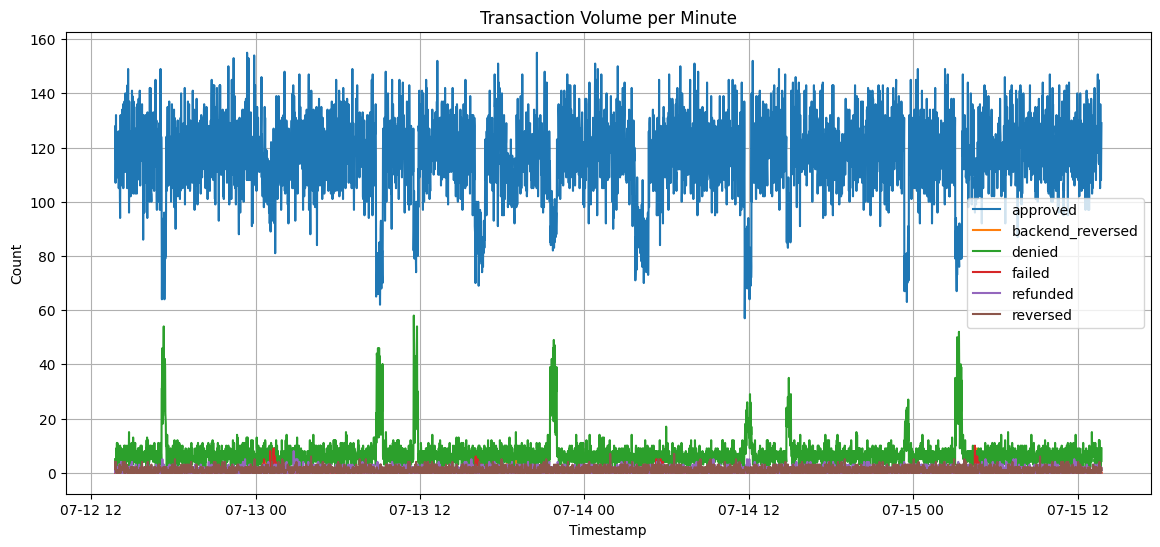

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_transactions, aggregate_by_minute
from model import AnomalyDetector

df = load_transactions()
grouped = aggregate_by_minute(df)

detector = AnomalyDetector()
detector.fit(grouped)
anomalies = detector.predict(grouped)

plt.figure(figsize=(14,6))
for status in ['failed', 'denied', 'reversed']:
    if status in grouped.columns:
        plt.plot(grouped['timestamp'], grouped[status], label=status)

plt.scatter(anomalies['timestamp'], [max(anomalies[status]) for status in ['failed', 'denied', 'reversed'] if status in anomalies.columns], color='red', label='Anomaly', zorder=5)
plt.title('Transaction Status per Minute with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()